# mBuild Tutorial 02: Reusing Components

This tutorial demonstrates how to create reusable components in mBuild, through definition of custom classes that inherit from the mbuild `Compound` class.

As in the prior tutorials, we need to first import mbuild (here as `mb`), import the visualization routines (as `visualize`), and apply the matplotlib command to redirect plots to the notebook window.

In [2]:
%matplotlib notebook
from visualize import visualize
import mbuild as mb

It would be quite tedious to have to go through each of the steps in prior tutorial (i.e. defining the particle positions and bonds) every time we wanted to create a new CH2 `Compound`. However, this problem is easily solved by wrapping these routines together into a class.

Here, we'll create a class for our CH2 moiety using the same approach we took in prior tutorial so that we can easily reuse this piece when constructing more complex molecules.

In [3]:
class CH2(mb.Compound):
    def __init__(self):
        super(CH2, self).__init__()
        
        carbon = mb.Particle(pos=[0.0, 0.0, 0.0], name='C')
        hydrogen = mb.Particle(pos=[0.1, 0.0, 0.0], name='H')
        hydrogen2 = mb.Particle(pos=[-0.1, 0.0, 0.0], name='H')
        self.add([carbon, hydrogen, hydrogen2])
        self.add_bond((carbon, hydrogen))
        self.add_bond((carbon, hydrogen2))

As we can see, our class definition contains the same commands we just used in the prior tutorial the create the ch2 `Compound`; however, we have replaced `ch2` with `self` so that these commands will be performed on any instance of our `CH2` class. Additionally, since we want our class instance to be an mBuild `Compound`, we specify that our `CH2` class should inherit from `mb.Compound`.

myCH2


<IPython.core.display.Javascript object>


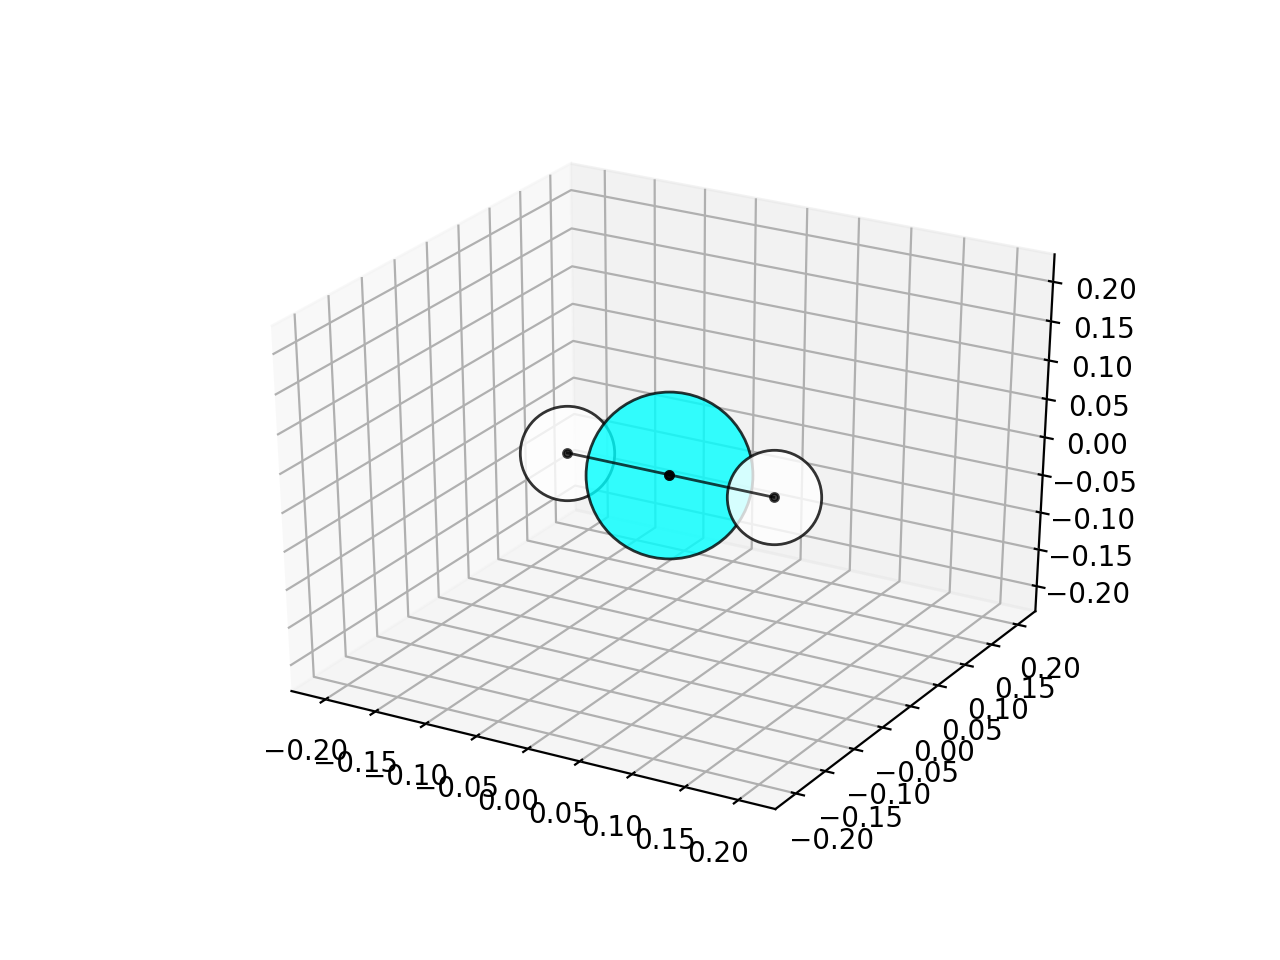

In [4]:
ch2 = CH2()
ch2.name = 'myCH2'
print(ch2.name)
visualize(ch2)

While there are instances where creating `Compounds` particle-by-particle is useful, this process can get a bit tedious. It's much easier to create them by loading in pre-assembled building blocks. These can easily be created using software such as [Avogadro](https://avogadro.cc/). The `load()` function can create mBuild `Compounds` from a variety of common file formats (e.g. PDB, MOL2) that contain particle positions and bonds. Here, we'll create the same CH2 `Compound` by loading from a PDB file.

**Note:** mBuild does not infer bonds. They must be explicitly defined in your code or in an input structure file.

In [4]:
class CH2(mb.Compound):
    def __init__(self):
        super(CH2, self).__init__()
        
        mb.load('ch2.pdb', compound=self)

<IPython.core.display.Javascript object>


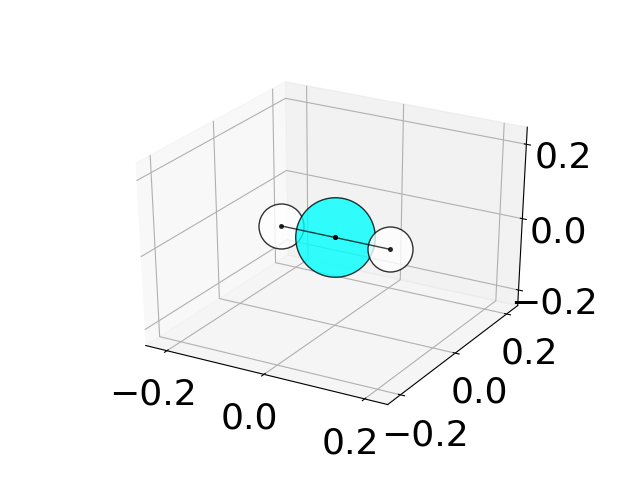

In [5]:
ch2 = CH2()
visualize(ch2)

This concludes the tutorial on creating reusable mBuild `Compounds` as Python classes. The next tutorial will demonstrate how another of mBuild's base classes, the `Port` class, can be used to create connections (bonds) between `Compounds` and move them in space.